In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# Team
- Group Name: Lone Wolf
- Name: Gao Mo
- Email: david113mo@gmail.com 
- Country: United States
- College: Carnegie Mellon University 
- Specialization: Data Science


# Problem description 
- A Company that sells many kinds of products requires us to replace the in-house
software designed to predict retailing with an AI/ML driven method. The models
that we implement should take seasonality and other additional factors into
account.

# Data Cleaning & Tranformation

In [11]:
data = pd.read_csv('forecasting.csv')
data['Price Discount (%)'] = data['Price Discount (%)'].apply(lambda x: int(x[:-1]))
data.head()

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
0,SKU1,2/5/2017,27750,0,0,0,0,0.0,0,0,0,0
1,SKU1,2/12/2017,29023,0,1,0,1,0.0,0,1,0,0
2,SKU1,2/19/2017,45630,17,0,0,0,0.0,0,0,0,0
3,SKU1,2/26/2017,26789,0,1,0,1,0.0,0,0,0,0
4,SKU1,3/5/2017,41999,17,0,0,0,0.0,0,0,0,0


In [12]:
data['Google_Mobility'] = data['Google_Mobility'].apply(lambda x: int(x))
data.head()

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
0,SKU1,2/5/2017,27750,0,0,0,0,0,0,0,0,0
1,SKU1,2/12/2017,29023,0,1,0,1,0,0,1,0,0
2,SKU1,2/19/2017,45630,17,0,0,0,0,0,0,0,0
3,SKU1,2/26/2017,26789,0,1,0,1,0,0,0,0,0
4,SKU1,3/5/2017,41999,17,0,0,0,0,0,0,0,0


In [13]:
from dateutil import parser
data.date = data.date.apply(lambda x: parser.parse(x))
data.head()

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
0,SKU1,2017-02-05,27750,0,0,0,0,0,0,0,0,0
1,SKU1,2017-02-12,29023,0,1,0,1,0,0,1,0,0
2,SKU1,2017-02-19,45630,17,0,0,0,0,0,0,0,0
3,SKU1,2017-02-26,26789,0,1,0,1,0,0,0,0,0
4,SKU1,2017-03-05,41999,17,0,0,0,0,0,0,0,0


In [14]:
data.Sales = data.Sales.apply(lambda x:  math.log(x) if x!=0 else x)
data.head()

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
0,SKU1,2017-02-05,10.230991,0,0,0,0,0,0,0,0,0
1,SKU1,2017-02-12,10.275844,0,1,0,1,0,0,1,0,0
2,SKU1,2017-02-19,10.728321,17,0,0,0,0,0,0,0,0
3,SKU1,2017-02-26,10.195747,0,1,0,1,0,0,0,0,0
4,SKU1,2017-03-05,10.645401,17,0,0,0,0,0,0,0,0


In [15]:
mean_sales = data.Sales.describe().mean()
std_sales = data.Sales.describe().std()
outliers = mean_sales + 1.5*std_sales
outliers

800.8543863355369

In [16]:
data = data[data.Sales <= outliers]
data

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
0,SKU1,2017-02-05,10.230991,0,0,0,0,0,0,0,0,0
1,SKU1,2017-02-12,10.275844,0,1,0,1,0,0,1,0,0
2,SKU1,2017-02-19,10.728321,17,0,0,0,0,0,0,0,0
3,SKU1,2017-02-26,10.195747,0,1,0,1,0,0,0,0,0
4,SKU1,2017-03-05,10.645401,17,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1213,SKU6,2020-10-18,11.478531,54,0,1,0,-7,1,0,0,0
1214,SKU6,2020-10-25,11.659603,52,0,1,0,-8,1,0,0,0
1215,SKU6,2020-11-01,11.932859,54,1,0,1,-7,1,0,0,0
1216,SKU6,2020-11-08,10.182822,44,1,0,1,-5,1,0,0,0


# EDA

In [17]:
data.columns

Index(['Product', 'date', 'Sales', 'Price Discount (%)', 'In-Store Promo',
       'Catalogue Promo', 'Store End Promo', 'Google_Mobility', 'Covid_Flag',
       'V_DAY', 'EASTER', 'CHRISTMAS'],
      dtype='object')

In [18]:
mean_discount = data.groupby('Product').agg({'Price Discount (%)': 'mean'}).reset_index()
mean_discount

,Product,Price Discount (%)
0,SKU1,10.892157
1,SKU2,13.838235
2,SKU3,38.156863
3,SKU4,35.215686
4,SKU5,20.705882
5,SKU6,32.020202


In [19]:
mean_discount.Product.to_list()
mean_discount['Price Discount (%)'].to_list()

[10.892156862745098,
 13.838235294117647,
 38.15686274509804,
 35.21568627450981,
 20.705882352941178,
 32.02020202020202]

Text(0, 0.5, 'Avg Percent Discount')

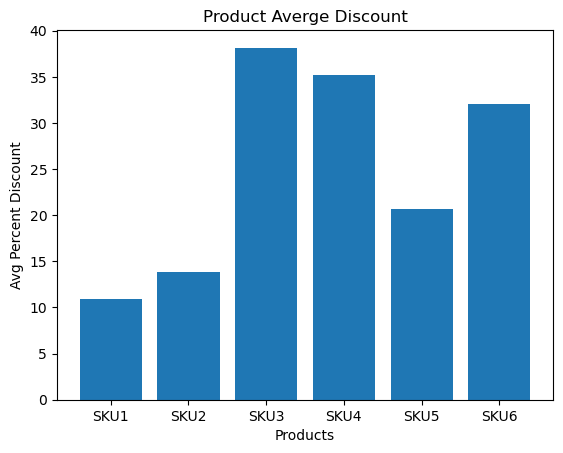

In [20]:
plt.bar(mean_discount.Product.to_list(),\
           mean_discount['Price Discount (%)'].to_list())
plt.title('Product Averge Discount')
plt.xlabel("Products") 
plt.ylabel("Avg Percent Discount")

In [21]:
sum_sales = data.groupby('Product').agg({'Sales': 'sum'}).reset_index()
sum_sales

,Product,Sales
0,SKU1,2116.525251
1,SKU2,1688.185204
2,SKU3,2111.827918
3,SKU4,1870.350004
4,SKU5,1868.228443
5,SKU6,2015.735406


Text(0, 0.5, 'Sales (Normalized)')

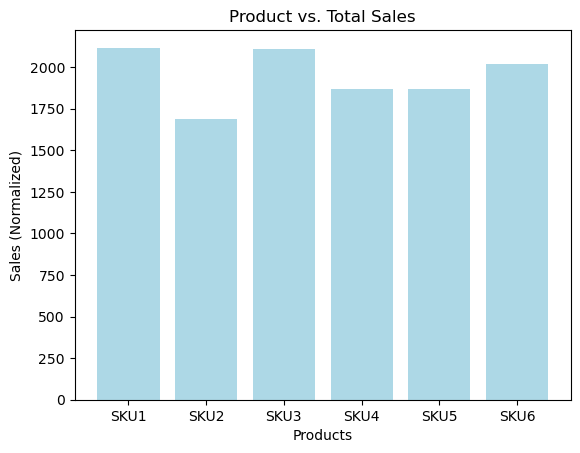

In [22]:
plt.bar(sum_sales.Product.to_list(),\
           sum_sales['Sales'].to_list(),\
       color = 'lightblue')
plt.title('Product vs. Total Sales')
plt.xlabel("Products") 
plt.ylabel("Sales (Normalized)")

In [23]:
holiday_data = data[(data['V_DAY'] == 1) | (data['EASTER'] == 1) | (data['CHRISTMAS'] == 1)]
holiday_data

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
1,SKU1,2017-02-12,10.275844,0,1,0,1,0,0,1,0,0
9,SKU1,2017-04-09,10.908796,17,1,0,0,0,0,0,1,0
43,SKU1,2017-12-03,11.102443,17,1,0,0,0,0,0,0,1
53,SKU1,2018-02-11,10.422400,0,1,0,1,0,0,1,0,0
61,SKU1,2018-04-08,10.466982,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1125,SKU6,2019-02-10,10.526615,38,0,0,0,0,0,1,0,0
1133,SKU6,2019-04-07,10.432114,38,0,0,0,0,0,0,1,0
1167,SKU6,2019-12-01,10.614622,38,0,0,0,0,0,0,0,1
1178,SKU6,2020-02-16,9.301551,53,1,0,1,3,1,1,0,0


In [24]:
holiday = holiday_data.groupby('Product').agg({'Sales': 'sum'}).reset_index()
holiday

,Product,Sales
0,SKU1,118.413039
1,SKU2,94.512051
2,SKU3,116.205709
3,SKU4,102.394454
4,SKU5,99.427015
5,SKU6,110.155410


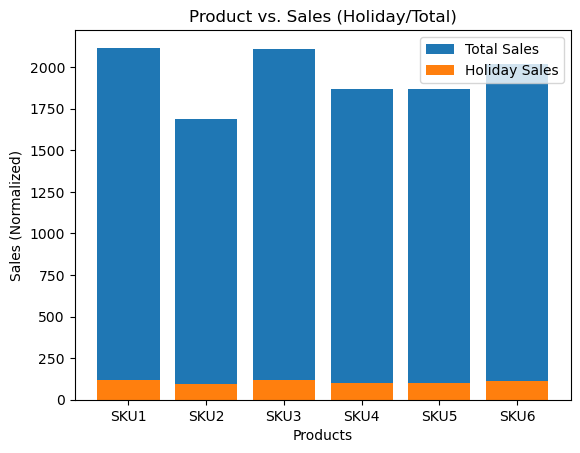

In [25]:
X = holiday.Product.to_list()
total = sum_sales.Sales.to_list()
holiday_count = holiday.Sales.to_list() 

X_axis = np.arange(len(X)) 
  
plt.bar(X, total, label = 'Total Sales') 
plt.bar(X, holiday_count, label = 'Holiday Sales') 
  
plt.xticks(X_axis, X) 
plt.xlabel("Products") 
plt.ylabel("Sales (Normalized)") 
plt.title("Product vs. Sales (Holiday/Total)") 
plt.legend() 
plt.show() 

Text(0, 0.5, 'Sales (Normalized)')

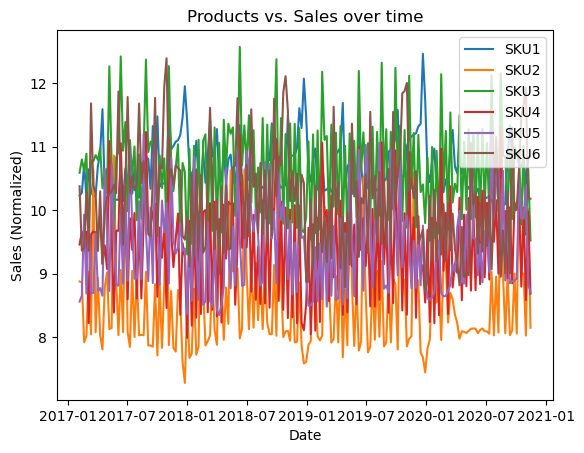

In [45]:
data = data[data.Sales > 7]
for i in data.Product.unique():
    prod = data[data['Product'] == i]
    plt.plot(prod.date, prod.Sales.to_list(),label = i)
plt.legend() 
plt.title('Products vs. Sales over time')


plt.xlabel("Date") 
plt.ylabel("Sales (Normalized)") 